In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from scipy import stats

from sklearn import neighbors, datasets

iris = datasets.load_iris()
#print(iris)
X, y = iris.data, iris.target
print(list(iris.target_names)) #prints class label
#print(iris.target)
# principal component analysis for dimentionality reduction.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#pca=PCA(0.95)#95% variance is maintained
pca.fit(X)
X_reduced = pca.transform(X)
print(pca.n_components_)
print(pca.explained_variance_ratio_) #tells how much info is given by each principal component


print("Original dataset shape:", X.shape)
print("Reduced dataset shape:", X_reduced.shape)


['setosa', 'versicolor', 'virginica']
2
[0.92461621 0.05301557]
Original dataset shape: (150, 4)
Reduced dataset shape: (150, 2)


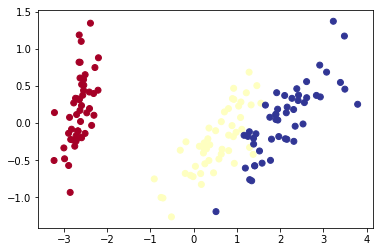

In [3]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

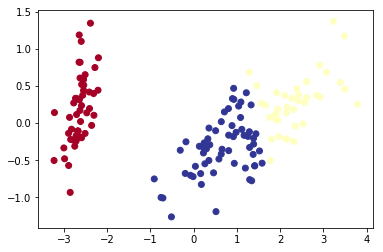

In [4]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X_reduced)
y_pred = k_means.predict(X_reduced)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');

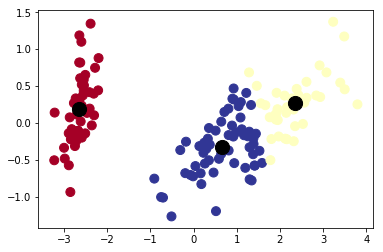

In [5]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, s=80, cmap='RdYlBu')

centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

(300, 2) (300,)


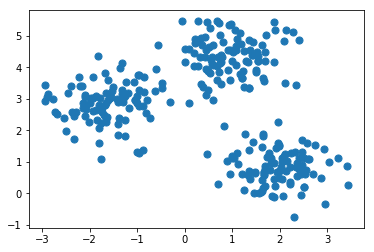

In [6]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=3,
                  random_state=0, cluster_std=0.60)
print(X.shape, y.shape) #y can take values 0,1,2 for 3 clusters but we're going to ignore y for the time being

# Visualizing the blobs as a scatter plot
plt.scatter(X[:, 0], X[:, 1], s=50); #s is scaler tells size of plot

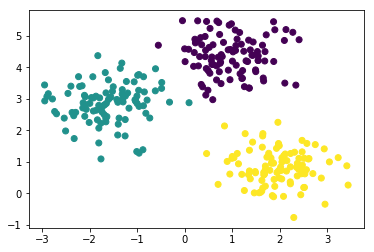

In [20]:
from sklearn.cluster import KMeans
ktest = KMeans(n_clusters=3) #number of clusters to predict 3
ktest.fit(X) #fitting the model to X
y_pred = ktest.predict(X) #predicting labels (y) and saving to y_pred

#Plotting predicted labels as a scatter
plt.scatter(X[:,0], X[:,1], c=y_pred)

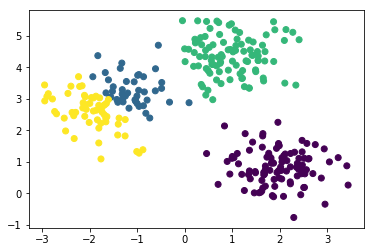

In [21]:
#Let's try changing around some parameters

#If we insist of finding 4 instead of 3 clusters

ktest = KMeans(n_clusters=4) #number of clusters to predict 4
ktest.fit(X) #fitting the model to X
y_pred = ktest.predict(X) #predicting labels (y) and saving to y_pred

#Plotting predicted labels as a scatter
plt.scatter(X[:,0], X[:,1], c=y_pred)

#K-Means tries its best to find separation

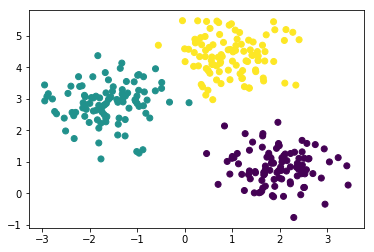

In [9]:
#Let's try changing around some parameters

#Setting max iterations to 100 instead of the default 300

ktest = KMeans(n_clusters=3, max_iter=100) #number of clusters to predict 4
ktest.fit(X) #fitting the model to X
y_pred = ktest.predict(X) #predicting labels (y) and saving to y_pred

#Plotting predicted labels as a scatter
plt.scatter(X[:,0], X[:,1], c=y_pred)

#Result doesn't look much different

(300, 2) (300,)


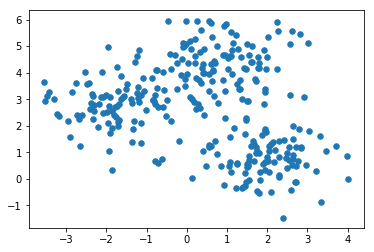

In [13]:
#Let's try to make it harder to find the clusters using the cluster_std parameter

X, y = make_blobs(n_samples=300, centers=3,
                  random_state=0, cluster_std=0.85)
print(X.shape, y.shape) #y can take values 0,1,2 for 3 clusters but we're going to ignore y for the time being

# Visualizing the blobs as a scatter plot
plt.scatter(X[:, 0], X[:, 1], s=30);

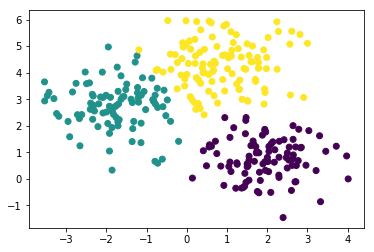

In [14]:
#Now again running K-Means with just 100 iterations

ktest = KMeans(n_clusters=3, max_iter=100) #number of clusters to predict 4
ktest.fit(X) #fitting the model to X
y_pred = ktest.predict(X) #predicting labels (y) and saving to y_pred

#Plotting predicted labels as a scatter
plt.scatter(X[:,0], X[:,1], c=y_pred)

#It's actually done a pretty good job of seperating the data


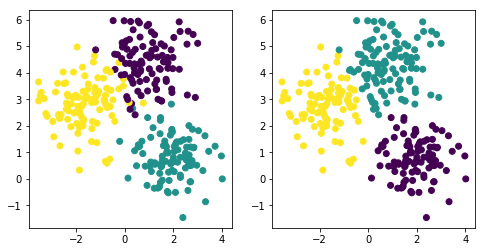

In [25]:
fig, ax=plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X[:,0], X[:,1],c=y)
ax[1].scatter(X[:,0], X[:,1],c=y_pred)

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())

#As the keys indicate, Digits dataset has images of digits stored under data and the actual digit stored under target
#There are 1797 images in total
print(digits.data.shape)
print(digits.target)

#the images are 8x8 pixels each stored as 64 dimensions to make it understandable for the ML algorithms.
print(digits.images.shape)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 64)
[0 1 2 ... 8 9 8]
(1797, 8, 8)


In [16]:
#Let's ignore targets for the time being and use K-Means to find clusters in these images. We know that there are a total
#10 clusters for 0-9 digits
X,y=digits.data, digits.target
k_digits = KMeans(n_clusters=10)
y_pred=k_digits.fit_predict(X)

#Let's check the parameter cluster centers of the estimator
print(k_digits.cluster_centers_.shape)


(10, 64)


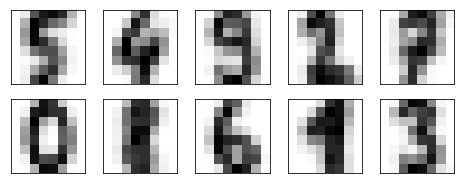

In [17]:
#The shape tells us these are centroids, that is the center of each of the clusters. In essence, 8x8 images of each of the 
#10 digits (atleast we expect it to be). Let's find out by visualizing these using scatter.

fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(k_digits.cluster_centers_[i],(8,8)), cmap=plt.cm.binary)

#That is pretty great. It actually was able to find the clusters of the 10 digits nicely.
#Number 8 doesn't look very clear but everything else looks very good.

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


Text(0.5,1,'Original Dataset reduced to 2D with PCA')

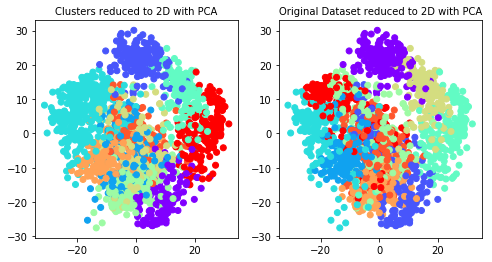

In [34]:
#Let's visualize predicted labels and original labels to see if they're close.

#Now, X is a 64 dimension dataset. If we need to visualize this in 2D, we'll need to use PCA to reduce
#the dimensionality. Refer to << >> for a demonstration of PCA.

from sklearn.decomposition import RandomizedPCA
pca=RandomizedPCA(2).fit(X)
X_proj = pca.transform(X)

fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].scatter(X_proj[:,0], X_proj[:,1], c=y_pred, cmap='rainbow')
ax[0].set_title('Clusters reduced to 2D with PCA', fontsize=10)

ax[1].scatter(X_proj[:,0], X_proj[:,1], c=y, cmap='rainbow')
ax[1].set_title('Original Dataset reduced to 2D with PCA', fontsize=10)

#This looks pretty reasonable considering we never used the original labels to learn (like so with Supervised learning)
#the clusters were automatically identified and they reasonably resemble the targets.